In [1]:

# Utility

from shutil import copyfile
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# Image processing
import cv2
from PIL import Image

# KDTree
from sklearn.neighbors import KDTree
import joblib

# Keras
from tensorflow import keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import mobilenet_v2, resnet

C:\Users\sam\AppData\Local\Temp\ipykernel_36968\852299009.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#sk-proj-HMX2KrKX2D6EKaAxRuCjT3BlbkFJzRivthTXvd0Na17cqPKt

# Utility

from shutil import copyfile
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np

# Image processing
import cv2
from PIL import Image

# KDTree
from sklearn.neighbors import KDTree
import joblib

# Keras
from tensorflow import keras
from tensorflow.keras.preprocessing import image as kimage
from tensorflow.keras.applications import mobilenet_v2, resnet

%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
from fastai.vision import *
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [3]:

dir_list = os.listdir('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/')
path = 'C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/'


print(len(dir_list))

196104


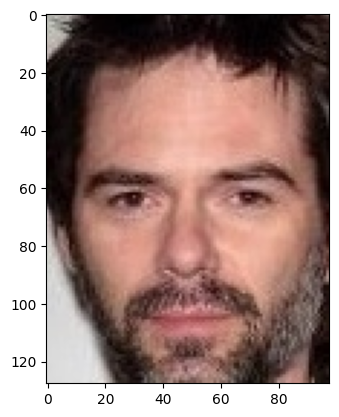

In [4]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/007968.jpg')
plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
plt.show()





In [5]:
print(im.shape[:2])

(128, 98)


In [ ]:

for i in dir_list:
  im  = cv2.imread(path+ i)
  height, width = im.shape[:2]
  if (height != 218 or width != 178):
    print(height, width)
print('Same dimensions')

The dimensions are standard: 218x178.

In order to crop the background as much as possible, we use a Haar cascade classifier to detect and crop faces in both datasets.

In [6]:
import cv2
import random

def cropImg(imgPath, scaleFactor, minNeighbors):
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting faces in image
    faces = faceCascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=minNeighbors, minSize=(30, 30))
    
    # Returning different codes to signify different conditions when no faces are detected
    if len(faces) == 0:
        # Try with adjusted scaleFactor if no faces are detected
        faces = faceCascade.detectMultiScale(gray, scaleFactor - 0.1, minNeighbors)
        if len(faces) == 0:
            return (0, None)  # No face detected
        elif len(faces) > 1:
            return (1, None)  # Multiple faces detected
        else:
            x, y, w, h = faces[0]
            # Apply adjustments when cropping the face
            a, b, c = 0, 0, 0
            if y - 30 >= 0:
                a = 30
            if y + h + 10 < img.shape[0]:
                b = 10
            if x - 5 >= 0 and x + w + 5 < img.shape[1]:
                c = 5
            croppedImg = img[y - a:y + h + b, x - c:x + w + c]
            return (2, croppedImg)  # Single face detected

    # Finding largest face from image (if multiple are detected)
    x, y, w, h = max(faces, key=lambda x: x[2] * x[3])
    croppedImg = img[y:y + h, x:x + w]
    
    # Apply adjustments when cropping the face
    a, b, c = 0, 0, 0
    if y - 30 >= 0:
        a = 30
    if y + h + 10 < img.shape[0]:
        b = 10
    if x - 5 >= 0 and x + w + 5 < img.shape[1]:
        c = 5
    croppedImg = img[y - a:y + h + b, x - c:x + w + c]
    
    return (2, croppedImg)  # Single face detected



Let's try an example!

In [ ]:
# Directory path
dir_path = 'C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/'

# List all files in the directory
dir_list = os.listdir(dir_path)
dir_list.sort()

# Initialize list to store files to be removed
to_remove = []

# Loop through each file in the directory
for el in dir_list:
    # Get the result from cropImg function
    res_code, cropped_img = cropImg(dir_path + el, 1.12, 5)
    
    # Check the result code
    if res_code == 2:
        # If a single face is detected, save the cropped image
        cv2.imwrite(dir_path + el, cropped_img)
    else:
        # If no face or multiple faces are detected, add the file to the list to be removed
        to_remove.append(el)

# Print the number of images to be deleted
print('Images to delete: '+ str(len(to_remove)) + '/202599.')

In [34]:
dir_path = 'C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/'
dir_list = os.listdir(dir_path)
dir_list.sort()
for file_name in dir_list:
    print(file_name)

000000.jpg
000001.jpg
000003.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
000010.jpg
000011.jpg
000012.jpg
000013.jpg
000014.jpg
000015.jpg
000016.jpg
000017.jpg
000018.jpg
000019.jpg
000020.jpg
000021.jpg
000022.jpg
000023.jpg
000024.jpg
000025.jpg
000026.jpg
000027.jpg
000028.jpg
000029.jpg
000030.jpg
000031.jpg
000032.jpg
000033.jpg
000034.jpg
000035.jpg
000036.jpg
000037.jpg
000038.jpg
000039.jpg
000040.jpg
000041.jpg
000042.jpg
000043.jpg
000044.jpg
000045.jpg
000047.jpg
000048.jpg
000049.jpg
000050.jpg
000051.jpg
000052.jpg
000053.jpg
000054.jpg
000055.jpg
000056.jpg
000057.jpg
000058.jpg
000059.jpg
000060.jpg
000061.jpg
000062.jpg
000063.jpg
000064.jpg
000065.jpg
000066.jpg
000067.jpg
000068.jpg
000069.jpg
000070.jpg
000071.jpg
000072.jpg
000073.jpg
000074.jpg
000075.jpg
000076.jpg
000077.jpg
000078.jpg
000079.jpg
000080.jpg
000081.jpg
000082.jpg
000083.jpg
000085.jpg
000086.jpg
000087.jpg
000088.jpg
000090.jpg
000091.jpg
000092.jpg
000093.jpg
000094.jpg

In [7]:
with open("C:/Users/sam/Downloads/to_remove.txt", 'r') as file:
    to_remove = file.readlines()

# Strip newline characters from each line
to_remove = [line.strip() for line in to_remove]

In [28]:
len(df)

196104

In [ ]:
for el in to_remove:
  os.remove('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + el)

We remove the celebrities even from the dataframe that we'll use later to estimate the accuracy.

In [31]:

# Extract the file names from the file list DataFrame
file_list_names = df['file_name'].tolist()

# Filter the CelebA DataFrame to keep only the rows with file names in the file list
df_common = df_celeba[df_celeba['image_id'].isin(file_list_names)]

In [32]:
df_common

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000003.jpg                -1               -1          -1   
2       000004.jpg                -1               -1           1   
3       000005.jpg                -1                1           1   
4       000006.jpg                -1                1           1   
...            ...               ...              ...         ...   
196098  196445.jpg                -1                1           1   
196099  196446.jpg                -1                1           1   
196100  196447.jpg                -1               -1          -1   
196101  196448.jpg                -1               -1          -1   
196102  196449.jpg                -1                1          -1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                    -1    -1     -1        -1        -1          -1   
1                    -1    -1     -1         1        -1          -1   
2                    -1    -1     -1        -1        -1          -1   
3                    -1    -1     -1         1        -1          -1   
4                    -1    -1     -1         1        -1          -1   
...                 ...   ...    ...       ...       ...         ...   
196098               -1    -1      1         1        -1          -1   
196099               -1    -1     -1        -1        -1          -1   
196100               -1    -1     -1        -1        -1           1   
196101               -1    -1     -1        -1        -1          -1   
196102               -1    -1     -1        -1        -1           1   

        Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0               -1      -1           1              -1      -1           -1   
1               -1       1          -1              -1      -1           -1   
2               -1      -1          -1              -1      -1           -1   
3               -1      -1          -1              -1      -1           -1   
4               -1      -1           1              -1      -1           -1   
...            ...     ...         ...             ...     ...          ...   
196098          -1      -1           1              -1      -1           -1   
196099          -1      -1          -1              -1      -1           -1   
196100          -1      -1          -1               1      -1           -1   
196101          -1      -1          -1               1      -1           -1   
196102          -1      -1          -1              -1      -1           -1   

        Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0               -1      -1         -1             1                1    -1   
1               -1      -1         -1            -1               -1     1   
2               -1      -1         -1            -1               -1    -1   
3               -1      -1         -1             1               -1    -1   
4               -1      -1         -1             1               -1    -1   
...            ...     ...        ...           ...              ...   ...   
196098          -1      -1         -1             1               -1    -1   
196099          -1      -1         -1             1               -1    -1   
196100          -1      -1         -1            -1               -1     1   
196101           1      -1         -1            -1                1     1   
196102          -1      -1         -1             1                1    -1   

        Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                         1        -1           -1         1         -1   
1                        -1        -1            1         1         -1   
2                        -1        -1           -1         1         -1   
3                        -1        -1            1         1         -1   
4                         1        -1           -1     

In [9]:
df_celeba = pd.read_csv('C:/Users/sam/Downloads/img_align_celeba/list_attr_celeba.csv')

df_othercelebs = pd.read_csv('C:/Users/sam/Downloads/LFW_Attributes-last.csv')

df_celeba

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                    -1    -1     -1        -1        -1          -1   
1                     1    -1     -1        -1         1          -1   
2                    -1    -1     -1         1        -1          -1   
3                    -1    -1     -1        -1        -1          -1   
4                    -1    -1     -1         1        -1          -1   
...                 ...   ...    ...       ...       ...         ...   
202594               -1    -1     -1         1        -1          -1   
202595               -1    -1      1         1        -1          -1   
202596               -1    -1     -1        -1        -1           1   
202597               -1    -1     -1         1        -1           1   
202598               -1    -1     -1        -1        -1          -1   

        Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0               -1      -1           1              -1      -1           -1   
1               -1      -1           1              -1      -1           -1   
2               -1       1          -1              -1      -1           -1   
3               -1      -1          -1              -1      -1           -1   
4               -1      -1          -1              -1      -1           -1   
...            ...     ...         ...             ...     ...          ...   
202594           1      -1          -1              -1      -1           -1   
202595           1      -1          -1              -1      -1           -1   
202596          -1      -1          -1              -1      -1           -1   
202597          -1      -1          -1               1      -1           -1   
202598           1      -1          -1              -1      -1           -1   

        Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0               -1      -1         -1             1                1    -1   
1               -1      -1         -1            -1                1    -1   
2               -1      -1         -1            -1               -1     1   
3               -1      -1         -1            -1               -1    -1   
4               -1      -1         -1             1               -1    -1   
...            ...     ...        ...           ...              ...   ...   
202594          -1      -1         -1            -1               -1    -1   
202595          -1      -1         -1            -1                1     1   
202596           1      -1         -1            -1                1     1   
202597          -1      -1         -1             1                1    -1   
202598          -1      -1         -1             1               -1    -1   

        Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                         1        -1           -1         1         -1   
1                         1        -1           -1         1         -1   
2                        -1        -1            1         1         -1   
3                        -1        -1           -1         1         -1   
4                        -1        -1            1     

In [10]:
for el in to_remove:
  df_celeba = df_celeba[df_celeba['image_id'] != el]

print(len(df_celeba))
df_celeba.reset_index(inplace = True, drop = True)
df_celeba.to_csv('C:/Users/sam/Downloads/img_align_celeba/list_attr_celeba_fin.csv', index = False)

198169


We rename the paths for both actors and celebrities for a better comprehension and because we removed some images from celebrities, so at present we cannot iterate the folder sequentially.

CROP TO FACES ONLY!

In [37]:
from random import random

# Cropping image to capture face only
def cropImg(imgPath):
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    img = cv2.imread(imgPath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Detecting faces in image
    faces = faceCascade.detectMultiScale(gray, scaleFactor = 1.1, minNeighbors = 5, minSize = (30, 30))
    
    # Returning the original image if no face is detected
    if len(faces) == 0:
        return img
    
    # Finding largest face from image (if multiple are detected)
    x, y, w, h = max(faces, key = lambda x : x[2] * x[3])
    croppedImg = img[y:y + h, x:x + w]
    
    # Plotting about 0.3% random original and cropped images
    if random() < 0.003:
        plt.figure(figsize = (6, 3))
        
        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')
        
        # Cropped image
        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(croppedImg, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')
        plt.axis('off')
        
        plt.show()
        
    return croppedImg

Copying files from sub-folders to main folder

In [ ]:
import os
import shutil

def copy_files_to_parent_folder(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            destination_path = os.path.join(root, '..', file_name)  # Parent folder path
            try:
                shutil.copy(file_path, destination_path)
            except PermissionError as e:
                print(f"Permission error for file {file_name}: {e}")

# Example usage
folder_path = 'C:/Users/sam/Downloads/archive_(2)/Cropped Faces'
copy_files_to_parent_folder(folder_path)
#del(el)

In [11]:
dir_list = os.listdir('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/')
dir_list.sort()

name = 0
for i in dir_list:
  os.rename('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + i, 'C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(name).zfill(6) + '.jpg')
  name+=1

In [12]:
import os
import pandas as pd

# Directory containing the renamed image files
directory = 'C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/'

# Get the list of file names in the directory
file_names = os.listdir(directory)
file_names.sort()

# Create a DataFrame with a column 'path' containing the full paths of the image files
df = pd.DataFrame({'path': [os.path.join(directory, file_name) for file_name in file_names]})


In [13]:

df.head()

path
0  C:/Users/sam/Downloads/img_align_celeba/img_al...
1  C:/Users/sam/Downloads/img_align_celeba/img_al...
2  C:/Users/sam/Downloads/img_align_celeba/img_al...
3  C:/Users/sam/Downloads/img_align_celeba/img_al...
4  C:/Users/sam/Downloads/img_align_celeba/img_al...

In [40]:
import cv2
import os


def crop_face(path, scaleFactor, minNeighbors):
    print(f"Processing image: {path}")
    # Read the input image
    im = cv2.imread(path)
    if im is None:
        print(f"Failed to load image: {path}")
        return (0, 0)
    # Convert the image to grayscale
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor, minNeighbors)
    if len(faces) == 0:
        # We may try to decrease the scaleFactor parameter
        faces = face_cascade.detectMultiScale(gray, scaleFactor - 0.1, minNeighbors)
        if len(faces) == 0:
            return (0, 0)
        elif len(faces) > 1:
            return (1, 0)
        else:
            # Draw rectangles around the faces
            for (x, y, w, h) in faces:
                a, b, c = 0, 0, 0
                # Crop the face
                if(y-30 >= 0):
                    a = 30
                if(y+h+10 < 218):
                    b = 10
                if(x-5 >= 0 and x+w+5 < 178):
                    c = 5
                face = im[y-a:y+h+b, x-c:x+w+c]
                return (2, face)
    elif len(faces) > 1:
        # We may try to increase the scaleFactor parameter
        faces = face_cascade.detectMultiScale(gray, scaleFactor + 0.1, minNeighbors)
        if len(faces) == 0:
            return (0, 0)
        elif len(faces) > 1:
            return (1, 0)
        else:
            # Draw rectangles around the faces
            for (x, y, w, h) in faces:
                a, b, c = 0, 0, 0
                # Crop the face
                if(y-30 >= 0):
                    a = 30
                if(y+h+10 < 218):
                    b = 10
                if(x-5 >= 0 and x+w+5 < 178):
                    c = 5
                face = im[y-a:y+h+b, x-c:x+w+c]
                return (2, face)
    else:
        # Draw rectangles around the faces
        for (x, y, w, h) in faces:
            a, b, c = 0, 0, 0
            # Crop the face
            if(y-30 >= 0):
                a = 30
            if(y+h+10 < 218):
                b = 10
            if(x-5 >= 0 and x+w+5 < 178):
                c = 5
            face = im[y-a:y+h+b, x-c:x+w+c]
            return (2, face)

# Initialize cascade classifier
face_cascade = cv2.CascadeClassifier('C:/Users/sam/Downloads/haarcascade_frontalface_default.xml')



In [19]:
for el in to_remove:
  os.remove('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + el)

In [20]:
path_csv ="C:/Users/sam/Downloads/img_align_celeba/list_attr_celeba.csv"

df_celeba = pd.read_csv(path_csv)

In [21]:
for el in to_remove:
  df_celeba = df_celeba[df_celeba['image_id'] != el]

print(len(df_celeba))
df_celeba.reset_index(inplace = True, drop = True)
df_celeba.to_csv("C:/Users/sam/Downloads/img_align_celeba/list_attr_celeba_cleaned.csv", index = False)

202253


In [141]:
dir_list = os.listdir('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/')
dir_list.sort()

name = 0
for i in dir_list:
  os.rename('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + i, 'C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(name).zfill(6) + '.jpg')
  name+=1

In [14]:
path_csv ="C:/Users/sam/Downloads/img_align_celeba/list_attr_celeba_fin.csv"

df_celeba = pd.read_csv(path_csv)
df_celeba

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000005.jpg                -1                1           1   
4       000006.jpg                -1                1           1   
...            ...               ...              ...         ...   
198164  202595.jpg                -1               -1           1   
198165  202596.jpg                -1               -1          -1   
198166  202597.jpg                -1               -1          -1   
198167  202598.jpg                -1                1           1   
198168  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                    -1    -1     -1        -1        -1          -1   
1                     1    -1     -1        -1         1          -1   
2                    -1    -1     -1         1        -1          -1   
3                    -1    -1     -1         1        -1          -1   
4                    -1    -1     -1         1        -1          -1   
...                 ...   ...    ...       ...       ...         ...   
198164               -1    -1     -1         1        -1          -1   
198165               -1    -1      1         1        -1          -1   
198166               -1    -1     -1        -1        -1           1   
198167               -1    -1     -1         1        -1           1   
198168               -1    -1     -1        -1        -1          -1   

        Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0               -1      -1           1              -1      -1           -1   
1               -1      -1           1              -1      -1           -1   
2               -1       1          -1              -1      -1           -1   
3               -1      -1          -1              -1      -1           -1   
4               -1      -1           1              -1      -1           -1   
...            ...     ...         ...             ...     ...          ...   
198164           1      -1          -1              -1      -1           -1   
198165           1      -1          -1              -1      -1           -1   
198166          -1      -1          -1              -1      -1           -1   
198167          -1      -1          -1               1      -1           -1   
198168           1      -1          -1              -1      -1           -1   

        Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0               -1      -1         -1             1                1    -1   
1               -1      -1         -1            -1                1    -1   
2               -1      -1         -1            -1               -1     1   
3               -1      -1         -1             1               -1    -1   
4               -1      -1         -1             1               -1    -1   
...            ...     ...        ...           ...              ...   ...   
198164          -1      -1         -1            -1               -1    -1   
198165          -1      -1         -1            -1                1     1   
198166           1      -1         -1            -1                1     1   
198167          -1      -1         -1             1                1    -1   
198168          -1      -1         -1             1               -1    -1   

        Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                         1        -1           -1         1         -1   
1                         1        -1           -1         1         -1   
2                        -1        -1            1         1         -1   
3                        -1        -1            1         1         -1   
4                         1        -1           -1     

# Cropping the actors from the dataset

In [1]:
import os
import cv2

def calculate_psnr(image_path):
    original = cv2.imread(image_path)
    degraded = cv2.imread(image_path)  # You can degrade the image if needed
    psnr = cv2.PSNR(original, degraded)
    return psnr

def find_best_quality_images(root_folder, quality_threshold=30, quantity_threshold=50, existing_list=None):
    selected_images = []
    selected_subcategories = set()  # Track selected subcategories
    if existing_list:
        selected_images = existing_list
    for actor_folder in os.listdir(root_folder):
        actor_folder_path = os.path.join(root_folder, actor_folder)
        if os.path.isdir(actor_folder_path):
            images = os.listdir(actor_folder_path)
            subcategory_selected = False  # Track if one image has already been selected from this subcategory
            for image_name in images:
                image_path = os.path.join(actor_folder_path, image_name)
                psnr = calculate_psnr(image_path)
                if psnr >= quality_threshold and not subcategory_selected:
                    selected_images.append((image_path, psnr))
                    subcategory_selected = True
                    selected_subcategories.add(actor_folder)  # Add selected subcategory
    # Sort images by PSNR (higher is better)
    selected_images.sort(key=lambda x: x[1], reverse=True)
    # If the number of selected images exceeds the quantity threshold, truncate the list
    if len(selected_images) > quantity_threshold:
        selected_images = selected_images[:quantity_threshold]
    return selected_images

root_folder = 'C:/Users/sam/Downloads/lfwa/lfw2/lfw2/'
quality_threshold = 30  # Adjust this threshold as needed
quantity_threshold = 70
existing_list = []  # Initialize an empty list if not already existing
best_images = find_best_quality_images(root_folder, quality_threshold, quantity_threshold, existing_list)

# Append the paths of selected images to an existing list
existing_list.extend([image_path for image_path, _ in best_images])

print("Selected image paths:")
for image_path in existing_list:
    print(image_path)


Selected image paths:
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Eckhart\Aaron_Eckhart_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Guiel\Aaron_Guiel_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Patterson\Aaron_Patterson_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Peirsol\Aaron_Peirsol_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pena\Aaron_Pena_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Sorkin\Aaron_Sorkin_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Tippin\Aaron_Tippin_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abbas_Kiarostami\Abbas_Kiarostami_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abba_Eban\Abba_Eban_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Aziz_Al-Hakim\Abdel_Aziz_Al-Hakim_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Madi_Shabneh\Abdel_Madi_Shabneh_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Nasser_Assidi\Abdel_Nasser_Assidi_0001.jpg
C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdoulaye_Wade\Abd

In [105]:
import pandas as pd

# List of image paths
Image_Path = [
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Eckhart/Aaron_Eckhart_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Guiel/Aaron_Guiel_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Patterson/Aaron_Patterson_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Peirsol/Aaron_Peirsol_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pena/Aaron_Pena_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Sorkin/Aaron_Sorkin_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Tippin/Aaron_Tippin_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abbas_Kiarostami/Abbas_Kiarostami_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abba_Eban/Abba_Eban_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Aziz_Al-Hakim/Abdel_Aziz_Al-Hakim_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Madi_Shabneh/Abdel_Madi_Shabneh_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Nasser_Assidi/Abdel_Nasser_Assidi_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdoulaye_Wade/Abdoulaye_Wade_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdulaziz_Kamilov/Abdulaziz_Kamilov_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah/Abdullah_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah_Ahmad_Badawi/Abdullah_Ahmad_Badawi_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah_al-Attiyah/Abdullah_al-Attiyah_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah_Gul/Abdullah_Gul_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah_Nasseef/Abdullah_Nasseef_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullatif_Sener/Abdullatif_Sener_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Majeed_Shobokshi/Abdul_Majeed_Shobokshi_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Rahman/Abdul_Rahman_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Aguilar/Abel_Aguilar_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Pacheco/Abel_Pacheco_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abid_Hamid_Mahmud_Al-Tikriti/Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abner_Martinez/Abner_Martinez_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abraham_Foxman/Abraham_Foxman_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aby_Har-Even/Aby_Har-Even_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ant/Adam_Ant_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Freier/Adam_Freier_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Herbert/Adam_Herbert_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Kennedy/Adam_Kennedy_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Mair/Adam_Mair_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Rich/Adam_Rich_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Sandler/Adam_Sandler_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Scott/Adam_Scott_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adelina_Avila/Adelina_Avila_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adel_Al-Jubeir/Adel_Al-Jubeir_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adisai_Bodharamik/Adisai_Bodharamik_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_Aguilar_Zinser/Adolfo_Aguilar_Zinser_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_Rodriguez_Saa/Adolfo_Rodriguez_Saa_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adoor_Gopalakarishnan/Adoor_Gopalakarishnan_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_Lima/Adriana_Lima_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_Perez_Navarro/Adriana_Perez_Navarro_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrianna_Zuzic/Adrianna_Zuzic_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_Annus/Adrian_Annus_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_Fernandez/Adrian_Fernandez_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_McPherson/Adrian_McPherson_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_Murrell/Adrian_Murrell_0001.jpg",
    "C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_Nastase/Adrian_Nastase_0001.jpg"]


In [186]:
df = pd.DataFrame(Image_Path, columns=['Image_Path'])
df

Image_Path
0   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Ec...
1   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Gu...
2   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pa...
3   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pe...
4   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pe...
5   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_So...
6   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Ti...
7   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abbas_Ki...
8   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abba_Eba...
9   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Az...
10  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Ma...
11  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Na...
12  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdoulay...
13  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdulazi...
14  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...
15  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...
16  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...
17  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...
18  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...
19  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullat...
20  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Ma...
21  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Ra...
22  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Agu...
23  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Pac...
24  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abid_Ham...
25  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abner_Ma...
26  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abraham_...
27  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aby_Har-...
28  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ant...
29  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Fre...
30  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Her...
31  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ken...
32  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Mai...
33  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ric...
34  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_San...
35  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Sco...
36  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adelina_...
37  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adel_Al-...
38  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adisai_B...
39  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_A...
40  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_R...
41  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adoor_Go...
42  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_...
43  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_...
44  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrianna...
45  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_A...
46  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_F...
47  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_M...
48  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_M...
49  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_N...

In [ ]:
import shutil

# Directory path for the new directory
new_dir_path = 'C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected'

# Create the new directory if it doesn't exist
if not os.path.exists(new_dir_path):
    os.makedirs(new_dir_path)

# Move the selected images to the new directory
for image_path in df.Image_Path:
    image_name = os.path.basename(image_path)
    new_image_path = os.path.join(new_dir_path, image_name)
    shutil.move(image_path, new_image_path)

print("Selected images moved to:", new_dir_path)

In [187]:
import os

# Extract the name and surname from the image path
df['Name'] = df['Image_Path'].apply(lambda x: ' '.join(os.path.basename(x).split('_')[:2]).replace('\\', ''))

df


Image_Path                   Name
0   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Ec...          Aaron Eckhart
1   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Gu...            Aaron Guiel
2   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pa...        Aaron Patterson
3   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pe...          Aaron Peirsol
4   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pe...             Aaron Pena
5   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_So...           Aaron Sorkin
6   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Ti...           Aaron Tippin
7   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abbas_Ki...       Abbas Kiarostami
8   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abba_Eba...              Abba Eban
9   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Az...             Abdel Aziz
10  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Ma...             Abdel Madi
11  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Na...           Abdel Nasser
12  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdoulay...         Abdoulaye Wade
13  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdulazi...      Abdulaziz Kamilov
14  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...      Abdullah 0001.jpg
15  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...         Abdullah Ahmad
16  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...    Abdullah al-Attiyah
17  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...           Abdullah Gul
18  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...       Abdullah Nasseef
19  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullat...       Abdullatif Sener
20  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Ma...           Abdul Majeed
21  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Ra...           Abdul Rahman
22  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Agu...           Abel Aguilar
23  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Pac...           Abel Pacheco
24  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abid_Ham...             Abid Hamid
25  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abner_Ma...         Abner Martinez
26  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abraham_...         Abraham Foxman
27  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aby_Har-...           Aby Har-Even
28  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ant...               Adam Ant
29  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Fre...            Adam Freier
30  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Her...           Adam Herbert
31  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ken...           Adam Kennedy
32  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Mai...              Adam Mair
33  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ric...              Adam Rich
34  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_San...           Adam Sandler
35  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Sco...             Adam Scott
36  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adelina_...          Adelina Avila
37  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adel_Al-...         Adel Al-Jubeir
38  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adisai_B...      Adisai Bodharamik
39  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_A...         Adolfo Aguilar
40  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_R...       Adolfo Rodriguez
41  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adoor_Go...  Adoor Gopalakarishnan
42  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_...           Adriana Lima
43  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_...          Adriana Perez
44  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrianna...         Adrianna Zuzic
45  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_A...           Adrian Annus
46  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_F...       Adrian Fernandez
47  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_M...       Adrian McPherson
48  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_M...         Adrian Murrell
49  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_N...         Adrian Nastase

In [110]:
def cropImg(image_path, face_cascade):
    print(f"Processing image: {image_path}")  # Debug: Print the image path
    # Read the input image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Failed to load image: {image_path}")
        return None, None

    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    if len(faces) == 0:
        # No faces detected
        print(f"No face detected in image: {image_path}")
        return None, None

    # Assume the first detected face is the one we want to crop
    (x, y, w, h) = faces[0]

    # Crop the face from the image
    cropped_face = img[y:y+h, x:x+w]

    return cropped_face, (x, y, w, h)

In [111]:
# Define the paths
croppedPath = "C:/Users/sam/Downloads/lfwa/lfw2/lfw2_crop"
os.makedirs(croppedPath, exist_ok=True)

# Load the Haar Cascade classifier
haar_cascade_path = 'C:/Users/sam/Downloads/haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(haar_cascade_path)

In [112]:
# Loop through each image path in the DataFrame
for idx, row in df.iterrows():
    img_path = row['Image_Path']
    name = row['Name']
    
    # Crop the image
    cropped_face, face_rect = cropImg(img_path, face_cascade)
    if cropped_face is not None:
        # Save the cropped face image
        cropped_img_path = os.path.join(croppedPath, os.path.basename(img_path))
        cv2.imwrite(cropped_img_path, cropped_face)
        print(f"Face detected and cropped for: {name}")
    else:
        print(f"No face detected for: {name}")

print('Processing completed.')

Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Eckhart/Aaron_Eckhart_0001.jpg
Face detected and cropped for: Aaron Eckhart
Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Guiel/Aaron_Guiel_0001.jpg
Face detected and cropped for: Aaron Guiel
Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Patterson/Aaron_Patterson_0001.jpg
Face detected and cropped for: Aaron Patterson
Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Peirsol/Aaron_Peirsol_0001.jpg
Face detected and cropped for: Aaron Peirsol
Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pena/Aaron_Pena_0001.jpg
Face detected and cropped for: Aaron Pena
Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Sorkin/Aaron_Sorkin_0001.jpg
Face detected and cropped for: Aaron Sorkin
Processing image: C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Tippin/Aaron_Tippin_0001.jpg
Face detected and cropped for: Aaron Tippin
Processing image: C:/Users/sam/Downloads/lfwa/lfw

In [153]:
dir_list = os.listdir('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/')
dir_list.sort()

name = 0
for i in dir_list:
  os.rename('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/' + i, 'C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/' + str(name).zfill(6) + '.jpg')
  name+=1

  

In [188]:
import os

# Update DataFrame with new file names and paths
new_paths = []
new_names = []

dir_list = os.listdir('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected')
dir_list.sort()

for i, file_name in enumerate(dir_list):
    new_name = str(i).zfill(6) + '.jpg'
    new_path = os.path.join('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected', new_name)
    new_paths.append(new_path)
    new_names.append(new_name)

# Update DataFrame with new file names and paths
df['New_Path'] = new_paths
df['New_Name'] = new_names




In [189]:
df

Image_Path                   Name  \
0   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Ec...          Aaron Eckhart   
1   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Gu...            Aaron Guiel   
2   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pa...        Aaron Patterson   
3   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pe...          Aaron Peirsol   
4   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Pe...             Aaron Pena   
5   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_So...           Aaron Sorkin   
6   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aaron_Ti...           Aaron Tippin   
7   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abbas_Ki...       Abbas Kiarostami   
8   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abba_Eba...              Abba Eban   
9   C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Az...             Abdel Aziz   
10  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Ma...             Abdel Madi   
11  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdel_Na...           Abdel Nasser   
12  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdoulay...         Abdoulaye Wade   
13  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdulazi...      Abdulaziz Kamilov   
14  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...      Abdullah 0001.jpg   
15  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...         Abdullah Ahmad   
16  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...    Abdullah al-Attiyah   
17  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...           Abdullah Gul   
18  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullah...       Abdullah Nasseef   
19  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdullat...       Abdullatif Sener   
20  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Ma...           Abdul Majeed   
21  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abdul_Ra...           Abdul Rahman   
22  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Agu...           Abel Aguilar   
23  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abel_Pac...           Abel Pacheco   
24  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abid_Ham...             Abid Hamid   
25  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abner_Ma...         Abner Martinez   
26  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Abraham_...         Abraham Foxman   
27  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Aby_Har-...           Aby Har-Even   
28  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ant...               Adam Ant   
29  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Fre...            Adam Freier   
30  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Her...           Adam Herbert   
31  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ken...           Adam Kennedy   
32  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Mai...              Adam Mair   
33  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Ric...              Adam Rich   
34  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_San...           Adam Sandler   
35  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adam_Sco...             Adam Scott   
36  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adelina_...          Adelina Avila   
37  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adel_Al-...         Adel Al-Jubeir   
38  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adisai_B...      Adisai Bodharamik   
39  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_A...         Adolfo Aguilar   
40  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adolfo_R...       Adolfo Rodriguez   
41  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adoor_Go...  Adoor Gopalakarishnan   
42  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_...           Adriana Lima   
43  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adriana_...          Adriana Perez   
44  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrianna...         Adrianna Zuzic   
45  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_A...           Adrian Annus   
46  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_F...       Adrian Fernandez   
47  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_M...       Adrian McPherson   
48  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/Adrian_M...         Adrian Murrell   
49  C:/Users/sam/Downloads/lfwa/lfw2/lfw2/A

In [259]:
names_to_select = df.Name.tolist()

len(df.Name.unique())

50

In [250]:
df_actors = pd.read_csv('C:/Users/sam/Downloads/LFW_Attributes-last.csv')
df_actors


Names  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0              Aaron Eckhart                 1               -1           1   
1      Megawati Sukarnoputri                -1               -1           1   
2      Megawati Sukarnoputri                -1               -1           1   
3      Megawati Sukarnoputri                -1                1           1   
4      Megawati Sukarnoputri                -1                1           1   
...                      ...               ...              ...         ...   
13138          George W Bush                 1               -1           1   
13139          George W Bush                -1               -1           1   
13140          George W Bush                -1               -1           1   
13141          George W Bush                -1               -1           1   
13142     Zydrunas Ilgauskas                -1               -1           1   

       Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                   -1    -1     -1        -1         1          -1   
1                   -1    -1     -1        -1        -1          -1   
2                    1    -1     -1        -1        -1          -1   
3                   -1    -1     -1         1        -1           1   
4                   -1    -1     -1         1        -1           1   
...                ...   ...    ...       ...       ...         ...   
13138               -1    -1     -1        -1         1          -1   
13139               -1    -1     -1         1        -1          -1   
13140                1    -1     -1        -1         1          -1   
13141                1    -1     -1        -1         1          -1   
13142               -1    -1     -1         1        -1          -1   

       Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0              -1      -1           1              -1      -1           -1   
1              -1       1           1              -1       1            1   
2              -1      -1          -1              -1       1           -1   
3              -1      -1          -1              -1      -1           -1   
4              -1      -1           1               1       1           -1   
...           ...     ...         ...             ...     ...          ...   
13138          -1      -1          -1               1      -1            1   
13139          -1      -1          -1               1       1            1   
13140          -1      -1          -1              -1       1            1   
13141          -1      -1          -1               1       1            1   
13142          -1      -1          -1               1      -1           -1   

       Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0              -1      -1         -1            -1               -1     1   
1               1      -1         -1            -1               -1    -1   
2              -1      -1         -1            -1                1    -1   
3              -1      -1         -1             1               -1    -1   
4               1      -1         -1             1               -1    -1   
...           ...     ...        ...           ...              ...   ...   
13138          -1      -1         -1            -1               -1     1   
13139          -1      -1         -1            -1               -1     1   
13140          -1      -1          1            -1                1     1   
13141          -1      -1         -1            -1               -1     1   
13142          -1      -1         -1            -1               -1     1   

       Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                       -1        -1            1         1          1   
1                        1        -1            1         1         -1   
2                       -1        -1            1         1         -1   
3                        1        -1           -1         1    

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                    -1    -1     -1        -1        -1          -1   
1                     1    -1     -1        -1         1          -1   
2                    -1    -1     -1         1        -1          -1   
3                    -1    -1     -1        -1        -1          -1   
4                    -1    -1     -1         1        -1          -1   
...                 ...   ...    ...       ...       ...         ...   
202594               -1    -1     -1         1        -1          -1   
202595               -1    -1      1         1        -1          -1   
202596               -1    -1     -1        -1        -1           1   
202597               -1    -1     -1         1        -1           1   
202598               -1    -1     -1        -1        -1          -1   

        Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0               -1      -1           1              -1      -1           -1   
1               -1      -1           1              -1      -1           -1   
2               -1       1          -1              -1      -1           -1   
3               -1      -1          -1              -1      -1           -1   
4               -1      -1          -1              -1      -1           -1   
...            ...     ...         ...             ...     ...          ...   
202594           1      -1          -1              -1      -1           -1   
202595           1      -1          -1              -1      -1           -1   
202596          -1      -1          -1              -1      -1           -1   
202597          -1      -1          -1               1      -1           -1   
202598           1      -1          -1              -1      -1           -1   

        Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0               -1      -1         -1             1                1    -1   
1               -1      -1         -1            -1                1    -1   
2               -1      -1         -1            -1               -1     1   
3               -1      -1         -1            -1               -1    -1   
4               -1      -1         -1             1               -1    -1   
...            ...     ...        ...           ...              ...   ...   
202594          -1      -1         -1            -1               -1    -1   
202595          -1      -1         -1            -1                1     1   
202596           1      -1         -1            -1                1     1   
202597          -1      -1         -1             1                1    -1   
202598          -1      -1         -1             1               -1    -1   

        Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                         1        -1           -1         1         -1   
1                         1        -1           -1         1         -1   
2                        -1        -1            1         1         -1   
3                        -1        -1           -1         1         -1   
4                        -1        -1            1     

In [270]:

# Select rows from df_actors where the 'Name' column matches the names in names_to_select
df_actors = df_actors[df_actors['Names'].isin(names_to_select)]
df_actors

Names  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0           Aaron Eckhart                 1               -1           1   
8728  Abdullah al-Attiyah                 1               -1           1   
8729  Abdullah al-Attiyah                 1               -1           1   
8730  Abdullah al-Attiyah                -1               -1           1   
8731         Abdullah Gul                 1                1           1   
...                   ...               ...              ...         ...   
8823         Adam Sandler                 1               -1           1   
8824         Adam Sandler                 1               -1           1   
8825         Adam Sandler                 1               -1           1   
8826           Adam Scott                -1               -1           1   
8827             Adam Ant                -1               -1           1   

      Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                  -1    -1     -1        -1         1          -1   
8728               -1    -1      1         1         1          -1   
8729                1    -1     -1         1        -1          -1   
8730                1    -1     -1         1         1          -1   
8731                1    -1     -1         1         1          -1   
...               ...   ...    ...       ...       ...         ...   
8823               -1    -1     -1         1         1          -1   
8824               -1    -1     -1         1        -1          -1   
8825               -1    -1     -1        -1         1          -1   
8826                1    -1     -1         1         1          -1   
8827               -1    -1     -1        -1        -1          -1   

      Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0             -1      -1           1              -1      -1           -1   
8728          -1       1          -1               1      -1           -1   
8729          -1      -1          -1               1       1            1   
8730          -1      -1          -1               1      -1           -1   
8731          -1      -1           1               1       1            1   
...          ...     ...         ...             ...     ...          ...   
8823          -1      -1          -1               1      -1           -1   
8824          -1      -1          -1               1      -1           -1   
8825          -1      -1           1               1      -1           -1   
8826          -1      -1          -1               1       1           -1   
8827          -1      -1           1              -1      -1           -1   

      Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0             -1      -1         -1            -1               -1     1   
8728          -1       1          1            -1               -1     1   
8729          -1      -1         -1            -1               -1     1   
8730          -1      -1          1            -1               -1     1   
8731          -1      -1         -1            -1               -1     1   
...          ...     ...        ...           ...              ...   ...   
8823          -1       1         -1            -1               -1     1   
8824          -1      -1         -1            -1               -1     1   
8825           1       1         -1            -1               -1     1   
8826           1      -1         -1            -1               -1     1   
8827          -1       1         -1            -1               -1     1   

      Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                      -1        -1            1         1          1   
8728                   -1        -1           -1        -1         -1   
8729                    1         1           -1         1         -1   
8730                   -1        -1           -1         1          1   
8731                   -1         1            1        -1     

In [121]:
# Define the path where you want to save the CSV file
csv_file_path = 'C:/Users/sam/Downloads/df_actor.csv'

# Export the DataFrame to a CSV file
df_actor.to_csv(csv_file_path, index=False)

In [120]:
!mkdir 'C:/Users/sam/Downloads/lfwa/lfw2/celeba'

The syntax of the command is incorrect.


In [271]:
dfactor=df_actors.copy()
dff = df.copy()

In [291]:
# Merge df_actors with df on the 'Names' column
merged_df = df_actors.merge(df, left_on='Names', right_on='Name', how='left')

# Replace the old names with new names and include Image_Path
merged_df['Names'] = merged_df['New_Name']
merged_df['Image_Path'] = merged_df['Image_Path']

# Drop unnecessary columns
merged_df = merged_df.drop(columns=['Name', 'New_Name'])

In [292]:
merged_df

Names  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0   000000.jpg                 1               -1           1   
1   000016.jpg                 1               -1           1   
2   000016.jpg                 1               -1           1   
3   000016.jpg                -1               -1           1   
4   000017.jpg                 1                1           1   
..         ...               ...              ...         ...   
73  000034.jpg                 1               -1           1   
74  000034.jpg                 1               -1           1   
75  000034.jpg                 1               -1           1   
76  000035.jpg                -1               -1           1   
77  000028.jpg                -1               -1           1   

    Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  Blond_Hair  \
0                -1    -1     -1        -1         1          -1          -1   
1                -1    -1      1         1         1          -1          -1   
2                 1    -1     -1         1        -1          -1          -1   
3                 1    -1     -1         1         1          -1          -1   
4                 1    -1     -1         1         1          -1          -1   
..              ...   ...    ...       ...       ...         ...         ...   
73               -1    -1     -1         1         1          -1          -1   
74               -1    -1     -1         1        -1          -1          -1   
75               -1    -1     -1        -1         1          -1          -1   
76                1    -1     -1         1         1          -1          -1   
77               -1    -1     -1        -1        -1          -1          -1   

    Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  Eyeglasses  \
0       -1           1              -1      -1           -1          -1   
1        1          -1               1      -1           -1          -1   
2       -1          -1               1       1            1          -1   
3       -1          -1               1      -1           -1          -1   
4       -1           1               1       1            1          -1   
..     ...         ...             ...     ...          ...         ...   
73      -1          -1               1      -1           -1          -1   
74      -1          -1               1      -1           -1          -1   
75      -1           1               1      -1           -1           1   
76      -1          -1               1       1           -1           1   
77      -1           1              -1      -1           -1          -1   

    Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0       -1         -1            -1               -1     1   
1        1          1            -1               -1     1   
2       -1         -1            -1               -1     1   
3       -1          1            -1               -1     1   
4       -1         -1            -1               -1     1   
..     ...        ...           ...              ...   ...   
73       1         -1            -1               -1     1   
74      -1         -1            -1               -1     1   
75       1         -1            -1               -1     1   
76      -1         -1            -1               -1     1   
77       1         -1            -1               -1     1   

    Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                    -1        -1            1         1          1   
1                    -1        -1           -1        -1         -1   
2                     1         1           -1         1         -1   
3                    -1        -1           -1         1          1   
4                    -1         1            1        -1         -1   
..                  ...       ...          ...       ...        ...   
73                   -1         1            1        -1          1   
74                   -1        -1            1       

# MobileNetV2

In [122]:
mobilenet = keras.applications.MobileNetV2(input_shape = (224, 224, 3), weights = 'imagenet', include_top = False, pooling = 'max')

In [123]:
def features_func(i, fill, path):
  # Load image
  im = kimage.load_img(path[:-4] + str(i).zfill(fill) + path[-4:], target_size = (224, 224))
  # Convert into numpy array
  x = kimage.img_to_array(im)
  # Preprocessing according to MobileNetV2
  x = keras.applications.mobilenet_v2.preprocess_input(x)
  # Expand dimensions
  x = np.expand_dims(x, axis = 0)
  # Extract features
  feat = mobilenet.predict(x, verbose = False)
  # Return features
  return feat.flatten()

In [136]:
import numpy as np
import pandas as pd
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image

# Define the feature extraction function
def features_func(idx, size, path):
    # Load image
    img_path = path.replace('.jpg', f'{idx:06d}.jpg')
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    # Extract features
    feat = mobilenet.predict(x, verbose=0)
    return feat.flatten()

In [ ]:

os.chdir("C:/Users/sam/Desktop/DSP/Image Retrieval/")

# Create a new directory named "celeba"
os.mkdir("celeba")

In [ ]:
import shutil

# Source directory
source_dir = "C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/"

# Destination directory
destination_dir = "C:/Users/sam/Desktop/DSP/Image Retrieval/celeba/"

# Recursively copy the contents of source_dir to destination_dir
shutil.copytree(source_dir, destination_dir, dirs_exist_ok=True)


In [ ]:


# List all files in the directory
dir_path = 'C:/Users/sam/Desktop/DSP/Image Retrieval/celeba/'
dir_list = os.listdir(dir_path)
dir_list.sort()

# Extract features for each image in the directory
features_celeb = [features_func(i, 6, path='C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/.jpg') for i in range(len(dir_list))]


In [ ]:
features_celeb = np.array(features_celeb)
features_celeb.shape

## KDTree

Building the search tree by means of KDTree from scikit-learn. 

In [51]:
tree = KDTree(features_celeb)

In [ ]:
import joblib

# Assuming 'tree' is your model object

# Define the path to save the model file
model_path = 'C:/Users/sam/Desktop/DSP/Image Retrieval/tree_model.joblib'

# Save the model to the specified path
joblib.dump(tree, model_path)


In [146]:
model_path='C:/Users/sam/Desktop/DSP/Image Retrieval/tree_model.joblib'

We query the tree that we previously saved. Specifically, we take the first 2 nearest-neighbors for each actor.

In [147]:
tree = joblib.load(model_path)

In [148]:
def features_func(i, fill, path):
    # Load image
    file_name = str(i).zfill(fill) + '.jpg'
    full_path = os.path.join(path, file_name)
    im = kimage.load_img(full_path, target_size=(224, 224))
    # Convert into numpy array
    x = kimage.img_to_array(im)
    # Preprocessing according to MobileNetV2
    x = keras.applications.mobilenet_v2.preprocess_input(x)
    # Expand dimensions
    x = np.expand_dims(x, axis=0)
    # Extract features
    feat = mobilenet.predict(x, verbose=False)
    # Return features
    return feat.flatten()


    


In [281]:
dir_list = os.listdir('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/')
dir_list.sort()

features_actors = [features_func(i, 6, path='C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/') for i in range(len(dir_list))]


In [282]:
features_actors = np.array(features_actors)
features_actors.shape



(50, 1280)

In [283]:
dist, ind = tree.query(features_actors, k = 2)

In [143]:
# df_actors = pd.read_csv('C:/Users/sam/Downloads/LFW_Attributes-last.csv')
df_celeba = pd.read_csv('C:/Users/sam/Downloads/img_align_celeba/list_attr_celeba.csv')

In [144]:
print('List of binary features:\n')
# We don't consider the first column because is the id of the image
print(list(df_actor.columns[1:]))

List of binary features:

['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [89]:
df_act = df_actor.head(66)


In [293]:
df_act = merged_df.head(50)

In [294]:
df_celeba

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  \
0       000001.jpg                -1                1           1   
1       000002.jpg                -1               -1          -1   
2       000003.jpg                -1               -1          -1   
3       000004.jpg                -1               -1           1   
4       000005.jpg                -1                1           1   
...            ...               ...              ...         ...   
202594  202595.jpg                -1               -1           1   
202595  202596.jpg                -1               -1          -1   
202596  202597.jpg                -1               -1          -1   
202597  202598.jpg                -1                1           1   
202598  202599.jpg                -1                1           1   

        Bags_Under_Eyes  Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  \
0                    -1    -1     -1        -1        -1          -1   
1                     1    -1     -1        -1         1          -1   
2                    -1    -1     -1         1        -1          -1   
3                    -1    -1     -1        -1        -1          -1   
4                    -1    -1     -1         1        -1          -1   
...                 ...   ...    ...       ...       ...         ...   
202594               -1    -1     -1         1        -1          -1   
202595               -1    -1      1         1        -1          -1   
202596               -1    -1     -1        -1        -1           1   
202597               -1    -1     -1         1        -1           1   
202598               -1    -1     -1        -1        -1          -1   

        Blond_Hair  Blurry  Brown_Hair  Bushy_Eyebrows  Chubby  Double_Chin  \
0               -1      -1           1              -1      -1           -1   
1               -1      -1           1              -1      -1           -1   
2               -1       1          -1              -1      -1           -1   
3               -1      -1          -1              -1      -1           -1   
4               -1      -1          -1              -1      -1           -1   
...            ...     ...         ...             ...     ...          ...   
202594           1      -1          -1              -1      -1           -1   
202595           1      -1          -1              -1      -1           -1   
202596          -1      -1          -1              -1      -1           -1   
202597          -1      -1          -1               1      -1           -1   
202598           1      -1          -1              -1      -1           -1   

        Eyeglasses  Goatee  Gray_Hair  Heavy_Makeup  High_Cheekbones  Male  \
0               -1      -1         -1             1                1    -1   
1               -1      -1         -1            -1                1    -1   
2               -1      -1         -1            -1               -1     1   
3               -1      -1         -1            -1               -1    -1   
4               -1      -1         -1             1               -1    -1   
...            ...     ...        ...           ...              ...   ...   
202594          -1      -1         -1            -1               -1    -1   
202595          -1      -1         -1            -1                1     1   
202596           1      -1         -1            -1                1     1   
202597          -1      -1         -1             1                1    -1   
202598          -1      -1         -1             1               -1    -1   

        Mouth_Slightly_Open  Mustache  Narrow_Eyes  No_Beard  Oval_Face  \
0                         1        -1           -1         1         -1   
1                         1        -1           -1         1         -1   
2                        -1        -1            1         1         -1   
3                        -1        -1           -1         1         -1   
4                        -1        -1            1     

In [96]:
# Initializing lists
acc_list_1 = []
acc_list_2 = []
best_acc_list = []
dist_list_1 = []
dist_list_2 = []
similar_celeb_indices = []

# We don't consider the first column because it is the id of the image
cols = df_act.columns[1:]

# Check the length of df_actor
num_actors = len(df_act)

# Check if the length of dist matches the number of actors
if len(dist) != num_actors:
    print("Error: Length of 'dist' does not match the number of actors in 'df_actor'.")
    # You need to fix the computation of 'dist' before proceeding.
else:
    # Compute accuracy and distance for each actor
    for i in range(num_actors):
        print('Actor ' + str(i + 1) + ':')
        count_1 = 0
        count_2 = 0
        # Save distances between actor and celebrity for both images
        # Make sure 'dist' has the correct dimensions
        if len(dist[i]) < 2:
            print(f"Error: Distance array for actor {i+1} does not have enough values.")
            continue  # Skip this actor if there are not enough distance values
        dist_1 = round(dist[i][0], 2)
        dist_2 = round(dist[i][1], 2)
        dist_list_1.append(dist_1)
        dist_list_2.append(dist_2)
        # Save indices related to the actor for both images
        ind_1 = ind[i][0]
        ind_2 = ind[i][1]
        # Now we compute the matches between the binary attributes
        for j in cols:
            # Compute matches for the first image
            if df_actors[j][i] == df_celeba[j][ind_1]:
                count_1 += 1
            # Compute matches for the second image
            if df_actors[j][i] == df_celeba[j][ind_2]:
                count_2 += 1

        # Compute accuracy for the first image
        acc_1 = round((count_1 / len(cols)) * 100, 2)
        acc_list_1.append(acc_1)
        print('Accuracy for first image: ' + str(acc_1) + '%')
        print('Distance for first image: ' + str(dist_1))

        # Compute accuracy for the second image
        acc_2 = round((count_2 / len(cols)) * 100, 2)
        acc_list_2.append(acc_2)
        print('Accuracy for second image: ' + str(acc_2) + '%')
        print('Distance for second image: ' + str(dist_2) + '\n')

        # Saving best result
        best_acc_list.append(max(acc_1, acc_2))
        
        # Find the index of the most similar celebrity
        if dist_1 < dist_2:
            similar_celeb_indices.append(ind_1)
            print('Index of similar celebrity for Actor ' + str(i + 1) + ':', ind_1)
        else:
            similar_celeb_indices.append(ind_2)
            print('Index of similar celebrity for Actor ' + str(i + 1) + ':', ind_2)

    print('Mean accuracy for first image: ' + str(round(np.mean(acc_list_1), 2)))
    print('Mean accuracy for second image: ' + str(round(np.mean(acc_list_2), 2)))
    print('Mean accuracy for top-2 images: ' + str(round(np.mean(best_acc_list), 2)))
    print('Mean distance for first image: ' + str(round(np.mean(dist_list_1), 2)))
    print('Mean distance for second image: ' + str(round(np.mean(dist_list_2), 2)))

    print('Indices of similar celebrities:', similar_celeb_indices)


Actor 1:
Accuracy for first image: 70.0%
Distance for first image: 64.94
Accuracy for second image: 70.0%
Distance for second image: 65.03

Index of similar celebrity for Actor 1: 84928
Actor 2:
Accuracy for first image: 67.5%
Distance for first image: 61.32
Accuracy for second image: 60.0%
Distance for second image: 64.08

Index of similar celebrity for Actor 2: 34127
Actor 3:
Accuracy for first image: 77.5%
Distance for first image: 66.37
Accuracy for second image: 67.5%
Distance for second image: 66.52

Index of similar celebrity for Actor 3: 149943
Actor 4:
Accuracy for first image: 80.0%
Distance for first image: 63.53
Accuracy for second image: 70.0%
Distance for second image: 63.95

Index of similar celebrity for Actor 4: 61332
Actor 5:
Accuracy for first image: 75.0%
Distance for first image: 62.02
Accuracy for second image: 65.0%
Distance for second image: 62.64

Index of similar celebrity for Actor 5: 54721
Actor 6:
Accuracy for first image: 52.5%
Distance for first image: 56

Text(0.5, 1.0, 'Acc: 86.49%')

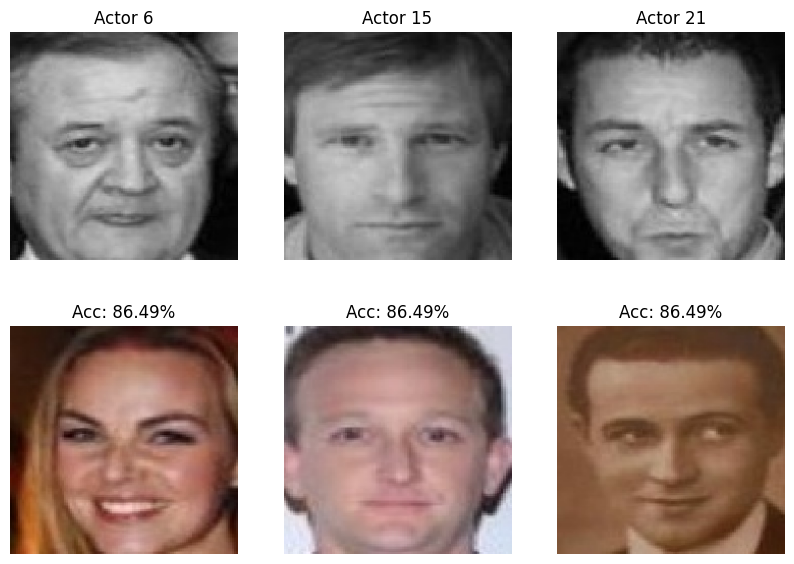

In [91]:
im6 = kimage.load_img('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/000014.jpg', target_size = (224, 224))
im15 = kimage.load_img('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/000000.jpg', target_size = (224, 224))
im21 = kimage.load_img('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/000032.jpg', target_size = (224, 224))

im6_celeb = kimage.load_img('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(ind[5][0]).zfill(6) + '.jpg', target_size = (224, 224))
im15_celeb = kimage.load_img('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(ind[14][0]).zfill(6) + '.jpg', target_size = (224, 224))
im21_celeb = kimage.load_img('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(ind[20][0]).zfill(6) + '.jpg', target_size = (224, 224))

fig = plt.figure(figsize = (10, 7))

fig.add_subplot(2, 3, 1)
plt.imshow(im6)
plt.axis('off')
plt.title("Actor 6")
fig.add_subplot(2, 3, 2)
plt.imshow(im15)
plt.axis('off')
plt.title("Actor 15")
fig.add_subplot(2, 3, 3)
plt.imshow(im21)
plt.axis('off')
plt.title("Actor 21")

fig.add_subplot(2, 3, 4)
plt.imshow(im6_celeb)
plt.axis('off')
plt.title("Acc: 86.49%")
fig.add_subplot(2, 3, 5)
plt.imshow(im15_celeb)
plt.axis('off')
plt.title("Acc: 86.49%")
fig.add_subplot(2, 3, 6)
plt.imshow(im21_celeb)
plt.axis('off')
plt.title("Acc: 86.49%")

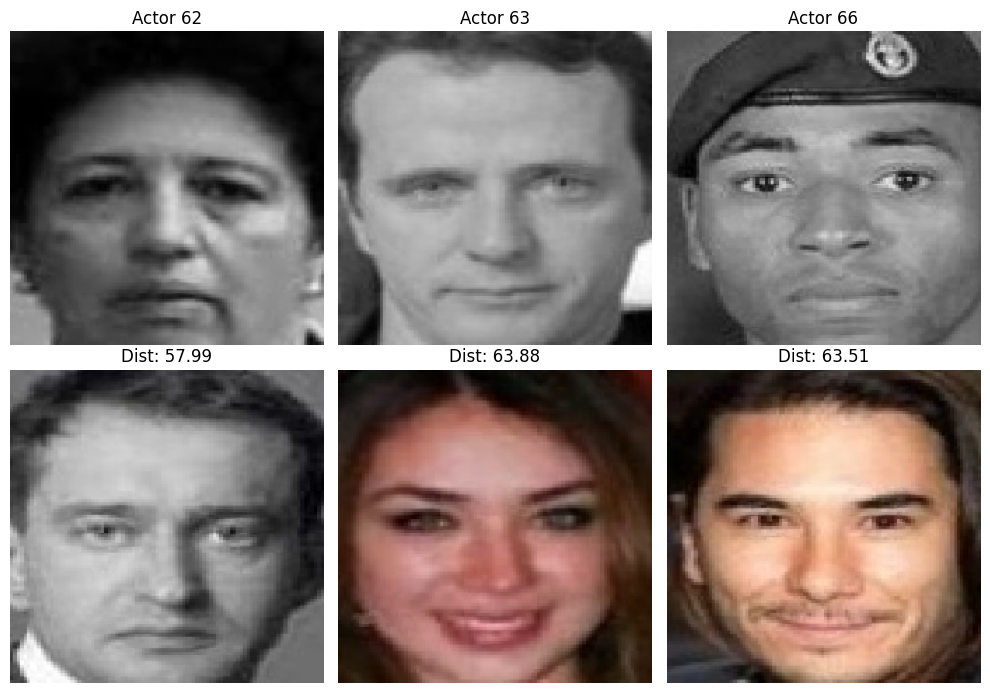

In [100]:
im62 = kimage.load_img('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/000062.jpg', target_size = (224, 224))
im63 = kimage.load_img('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/000063.jpg', target_size = (224, 224))
im66 = kimage.load_img('C:/Users/sam/Downloads/lfwa/lfw2/lfw2_selected/000065.jpg', target_size = (224, 224))

# Load images using the indices of similar celebrities
im62_celeb = kimage.load_img('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(similar_celeb_indices[62]).zfill(6) + '.jpg', target_size=(224, 224))
im63_celeb = kimage.load_img('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(similar_celeb_indices[63]).zfill(6) + '.jpg', target_size=(224, 224))
im66_celeb = kimage.load_img('C:/Users/sam/Downloads/img_align_celeba/img_align_celeba/' + str(similar_celeb_indices[65]).zfill(6) + '.jpg', target_size=(224, 224))

fig = plt.figure(figsize=(10, 7))

fig.add_subplot(2, 3, 1)
plt.imshow(im62)
plt.axis('off')
plt.title("Actor 62")

fig.add_subplot(2, 3, 2)
plt.imshow(im63)
plt.axis('off')
plt.title("Actor 63")

fig.add_subplot(2, 3, 3)
plt.imshow(im66)
plt.axis('off')
plt.title("Actor 66")

fig.add_subplot(2, 3, 4)
plt.imshow(im62_celeb)
plt.axis('off')
plt.title("Dist: 57.99")

fig.add_subplot(2, 3, 5)
plt.imshow(im63_celeb)
plt.axis('off')
plt.title("Dist: 63.88")

fig.add_subplot(2, 3, 6)
plt.imshow(im66_celeb)
plt.axis('off')
plt.title("Dist: 63.51")

plt.tight_layout()
plt.show()
